In [1]:
import torch
import CocoFolder
import Mytransforms
import numpy as np
import cv2
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dir = ['/home/hypan/data/coco/filelist/train2014.txt','/home/hypan/data/coco/json/train2014.json']

loader = torch.utils.data.DataLoader(
    CocoFolder.CocoFolder(dir, 8,
                         Mytransforms.Compose([Mytransforms.RandomRotate(40),
                                     Mytransforms.RandomResizedCrop(368, 40),
                                     Mytransforms.RandomHorizontalFlip(),
                                    ])),
    batch_size=4, shuffle=False,
    num_workers=1, pin_memory=True)

In [3]:
for i, (input, heatmap, vecmap, mask) in enumerate(loader):
    imgs = input.numpy()
    heats = heatmap.numpy()
    vectors = vecmap.numpy()
    masks = mask.numpy()
    break

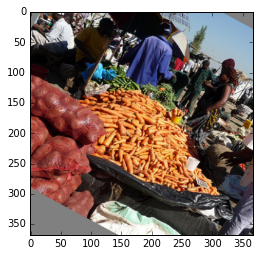

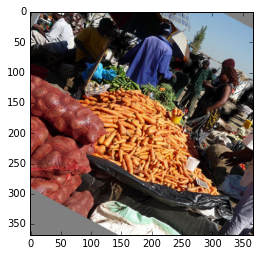

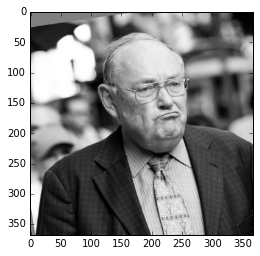

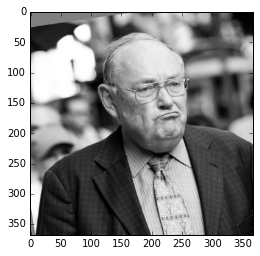

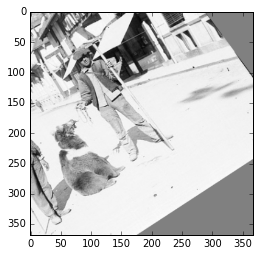

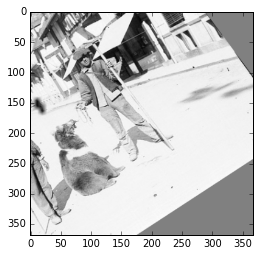

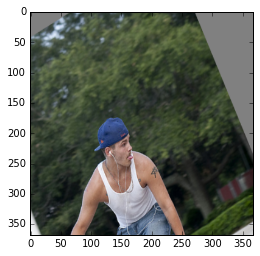

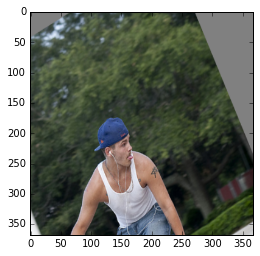

In [4]:
for i in range(4):
    img = imgs[i,:,:,:]
    img = img.transpose(1, 2, 0)
    img *= 128
    img += 128
    img /= 255
    plt.imshow(img)
    plt.show()
    plt.close()
    
    mask = masks[i,:,:,:]
    mask = mask.transpose(1,2,0)
    mask = cv2.resize(mask, (368, 368))
    mask = mask.reshape((368, 368, 1))
    new_img = img * mask
    plt.imshow(new_img)
    plt.show()
    
    heatmap = heats[i,:,:,:]
    heatmap = heatmap.transpose(1, 2, 0)
    heatmap = cv2.resize(heatmap, (368, 368))
    